In [131]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [111]:
df = pd.read_csv('D:/Prog/ML/datasets/caterpillar-tube-pricing/competition_data/train_set.csv')

In [112]:
df.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [113]:
df['bracket_pricing'] = df['bracket_pricing'].map({'Yes':1, 'No':0})
df.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,1,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,1,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,1,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,1,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,1,25,3.541561


In [114]:
df.describe()

,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
count,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000
mean,120.369377,2.084699,0.869924,38.389369,13.433317
std,1590.331872,12.742776,0.336393,70.761392,28.663200
min,0.000000,0.000000,0.000000,1.000000,0.503553
25%,0.000000,0.000000,1.000000,2.000000,3.878190
50%,0.000000,0.000000,1.000000,10.000000,6.521146
75%,2.000000,0.000000,1.000000,40.000000,13.431781
max,150000.000000,535.000000,1.000000,2500.000000,1000.000000


In [115]:
for col in df.columns:
    print(f'{col} = {len(df[col].dropna())}')

tube_assembly_id = 30213
supplier = 30213
quote_date = 30213
annual_usage = 30213
min_order_quantity = 30213
bracket_pricing = 30213
quantity = 30213
cost = 30213


In [145]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:-1], df.iloc[:,-1], test_size=0.3, random_state=8)

In [147]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
squared_errors = []
predictions = model.predict(X_test)
print(len(predictions), len(y_test))
for pred, lab in zip(predictions, y_test):
    squared_errors.append((pred-lab)**2)
mean_squared_error = sum(squared_errors)/len(squared_errors)
print('Mean Squared Error: {0}'.format(mean_squared_error))

9064 9064
Mean Squared Error: 720.5075952456169


In [127]:
import matplotlib.pyplot as plt

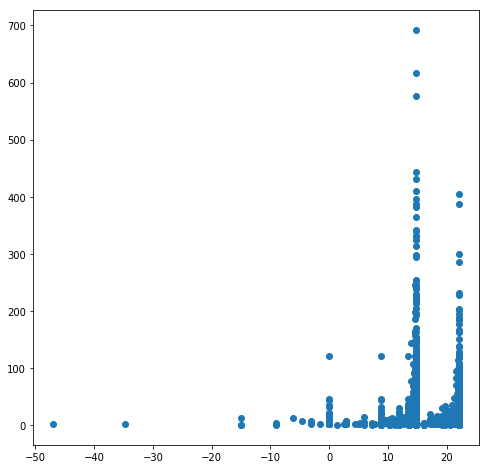

In [128]:
plt.figure(figsize=(8,8))
plt.scatter(x=predictions, y=y_test)
plt.show()